# Data Summary

The dataset consists of **seven tables** as follows:

---

#### 1. `drivers_table`
Contains information about truck drivers (9 fields):
- **driver_id**: unique identification for each driver  
- **name**: name of the truck driver  
- **gender**: gender of the truck driver  
- **age**: age of the truck driver  
- **experience**: experience of the truck driver in years  
- **driving_style**: driving style (`conservative` or `proactive`)  
- **ratings**: average rating on a scale of 1 to 10  
- **vehicle_no**: the truck number  
- **average_speed_mph**: average speed in miles per hour  

#### 2. `trucks_table`
Contains information about trucks (5 fields):
- **truck_id**: unique truck identifier  
- **truck_age**: age of the truck in years  
- **load_capacity_pounds**: loading capacity in pounds  
- **mileage_mpg**: mileage in miles per gallon  
- **fuel_type**: type of fuel  

#### 3. `routes_table`
Contains route details (5 fields):
- **route_id**: unique route identifier  
- **origin_id**: city ID for the origin city  
- **destination_id**: city ID for the destination city  
- **distance**: distance between origin and destination (miles)  
- **average_hours**: average travel time (hours) 

#### 4. `traffic_data`
Contains traffic information for routes on an hourly basis (5 fields):
- **route_id**: route identifier  
- **date**: observation date  
- **hour**: hour of observation (0-23)  
- **no_of_vehicles**: number of vehicles observed  
- **accident**: binary variable indicating if an accident occurred  

#### 5. `truck_schedule_table`
Contains historical truck schedule data and delays (5 fields):
- **truck_id**: truck identifier  
- **route_id**: route identifier  
- **departure_date**: departure datetime  
- **estimated_arrival**: estimated arrival datetime  
- **delay**: binary variable (0 = on-time, 1 = delayed)  

#### 6. `city_weather`
Contains historical city weather data (14 fields):
- **city_id**: city identifier  
- **date**: observation date  
- **hour**: hour of observation (0-23)  
- **temp(°F)**: temperature in Fahrenheit  
- **wind_speed**: wind speed (mph)  
- **description**: weather description (Clear, Cloudy, etc.)  
- **precip**: precipitation in inches  
- **humidity**: humidity observed  
- **visibility**: visibility in miles  
- **pressure**: pressure in millibar  
- **chanceofrain**: chance of rain  
- **chanceoffog**: chance of fog  
- **chanceofsnow**: chance of snow  
- **chanceofthunder**: chance of thunder  

#### 7. `routes_weather`
Contains historical route weather data (13 fields):
- **route_id**: unique route identifier  
- **date**: datetime of observation  
- **temp(°F)**: temperature in Fahrenheit  
- **wind_speed**: wind speed (mph)  
- **description**: weather description  
- **precip**: precipitation in inches  
- **humidity**: humidity observed  
- **visibility**: visibility in miles  
- **pressure**: pressure in millibar  
- **chanceofrain**: chance of rain  
- **chanceoffog**: chance of fog  
- **chanceofsnow**: chance of snow  
- **chanceofthunder**: chance of thunder  

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Postgres

In [2]:
import psycopg2
import pandas as pd

postgres_connection = psycopg2.connect(
    user="postgres",           
    password="root",    
    host="localhost",  
    database="truckDB",              
    port="5432"                  
)

In [3]:
routes_df = pd.read_sql("select * from routes_details", postgres_connection)
routes_df.head()

,route_id,origin_id,destination_id,distance,average_hours
0,R-ada2a391,C-927ceb5e,C-56e39a5e,1735.06,34.70
1,R-ae0ef31f,C-927ceb5e,C-73ae5412,1498.24,29.96
2,R-4beec5fd,C-927ceb5e,C-4fe0fa24,6078.46,121.57
3,R-8d7a7fb2,C-927ceb5e,C-451776b7,1543.01,30.86
4,R-b236e347,C-927ceb5e,C-d80a1e7d,310.75,6.22


In [4]:
route_weather = pd.read_sql("Select * from routes_weather", postgres_connection)
route_weather.head()

,route_id,Date,temp,wind_speed,description,precip,humidity,visibility,pressure,chanceofrain,chanceoffog,chanceofsnow,chanceofthunder
0,R-ada2a391,2019-01-01 00:00:00,30.0,11.0,Heavy snow,0.0,90,1.0,1010,0,0,0,0
1,R-ada2a391,2019-01-01 06:00:00,30.0,11.0,Heavy snow,0.0,91,3.0,1012,0,0,0,0
2,R-ada2a391,2019-01-02 00:00:00,28.0,11.0,Cloudy,0.0,91,4.0,1013,0,0,0,0
3,R-ada2a391,2019-01-02 06:00:00,27.0,11.0,Cloudy,0.0,92,6.0,1015,0,0,0,0
4,R-ada2a391,2019-01-03 00:00:00,27.0,9.0,Cloudy,0.0,93,6.0,1016,0,0,0,0


# MySQL

In [5]:
import pymysql
import numpy as np

mysql_connection = pymysql.connect(
     host = "localhost",  
     user = "root",                       
     password = "123456",           
     database = "truckDB"                 
)


In [6]:
trucks_df = pd.read_sql("select * from truck_details", mysql_connection)
trucks_df.head()

,truck_id,truck_age,load_capacity_pounds,mileage_mpg,fuel_type
0,42302347,10,3000.0,17,gas
1,27867488,14,10000.0,22,diesel
2,13927774,8,10000.0,19,gas
3,69577118,8,20000.0,19,gas
4,28650047,10,4000.0,21,diesel


In [7]:
traffic_df = pd.read_sql("select * from traffic_details", mysql_connection)
traffic_df.head()

,route_id,date,hour,no_of_vehicles,accident
0,R-ada2a391,2019-01-01,0,669.0,0
1,R-ada2a391,2019-01-01,100,628.0,0
2,R-ada2a391,2019-01-01,200,516.0,0
3,R-ada2a391,2019-01-01,300,582.0,0
4,R-ada2a391,2019-01-01,400,564.0,0


In [8]:
schedule_df = pd.read_sql("select * from truck_schedule_data", mysql_connection)
schedule_df.head()

,truck_id,route_id,departure_date,estimated_arrival,delay
0,30312694,R-b236e347,2019-01-01 07:00:00,2019-01-01 13:13:12.,0
1,59856374,R-29ea762e,2019-01-01 07:00:00,2019-01-02 04:01:12.,0
2,12602955,R-a3d67783,2019-01-01 07:00:00,2019-01-01 07:45:36.,0
3,46619422,R-31ec9310,2019-01-01 07:00:00,2019-01-01 20:46:48.,0
4,10140178,R-a07c5dbd,2019-01-01 07:00:00,2019-01-01 21:34:11.,0


In [9]:
weather_df = pd.read_sql("select * from city_weather", mysql_connection)
weather_df.head()

,city_id,date,hour,temp,wind_speed,description,precip,humidity,visibility,pressure,chanceofrain,chanceoffog,chanceofsnow,chanceofthunder
0,C-927ceb5e,2019-01-01,0,30.0,11.0,Light snow,0.0,86,6.0,1019.0,0.0,0.0,0.0,0.0
1,C-927ceb5e,2019-01-01,100,28.0,12.0,Light snow,0.0,86,5.0,1021.0,0.0,0.0,0.0,0.0
2,C-927ceb5e,2019-01-01,200,28.0,13.0,Moderate snow,0.0,85,4.0,1022.0,0.0,0.0,0.0,0.0
3,C-927ceb5e,2019-01-01,300,28.0,14.0,Moderate snow,0.0,84,3.0,1024.0,0.0,0.0,0.0,0.0
4,C-927ceb5e,2019-01-01,400,28.0,13.0,Moderate snow,0.0,84,3.0,1025.0,0.0,0.0,0.0,0.0


In [10]:
drivers_df = pd.read_sql("select * from drivers_details", mysql_connection)
drivers_df.head()

,driver_id,name,gender,age,experience,driving_style,ratings,vehicle_no,average_speed_mph
0,d9f30553-6,Daniel Marks,male,47,5,proactive,7,42302347,62.22
1,82de7bb8-2,Clifford Carr,male,47,14,proactive,4,27867488,60.89
2,7e789842-4,Terry Faulkner MD,male,41,9,conservative,2,13927774,53.67
3,b2555587-8,Brendan Jacobs,male,44,10,proactive,2,69577118,59.82
4,b2e58421-d,Vincent Davis,male,41,10,proactive,7,28650047,62.65


# Data Exploration

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
weather_df['date'] = pd.to_datetime(weather_df['date'])
route_weather['Date'] = pd.to_datetime(route_weather['Date'])
traffic_df['date'] = pd.to_datetime(traffic_df['date'])
schedule_df['departure_date'] = pd.to_datetime(schedule_df['departure_date'])
schedule_df['estimated_arrival'] = pd.to_datetime(schedule_df['estimated_arrival'])

### Driver's Data Analysis

In [13]:
drivers_df.head(2)

,driver_id,name,gender,age,experience,driving_style,ratings,vehicle_no,average_speed_mph
0,d9f30553-6,Daniel Marks,male,47,5,proactive,7,42302347,62.22
1,82de7bb8-2,Clifford Carr,male,47,14,proactive,4,27867488,60.89


In [14]:
drivers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   driver_id          1300 non-null   object 
 1   name               1300 non-null   object 
 2   gender             1277 non-null   object 
 3   age                1300 non-null   int64  
 4   experience         1300 non-null   int64  
 5   driving_style      1248 non-null   object 
 6   ratings            1300 non-null   int64  
 7   vehicle_no         1300 non-null   int64  
 8   average_speed_mph  1300 non-null   float64
dtypes: float64(1), int64(4), object(4)
memory usage: 91.5+ KB


In [15]:
drivers_df.describe(include='all')

,driver_id,name,gender,age,experience,driving_style,ratings,vehicle_no,average_speed_mph
count,1300,1300,1277,1300.000000,1300.000000,1248,1300.000000,1.300000e+03,1300.000000
unique,1300,1274,2,NaN,NaN,2,NaN,NaN,NaN
top,d9f30553-6,Michael Parker,male,NaN,NaN,proactive,NaN,NaN,NaN
freq,1,3,1198,NaN,NaN,648,NaN,NaN,NaN
mean,NaN,NaN,NaN,47.814615,11.988462,NaN,5.633846,3.263242e+07,53.262854
std,NaN,NaN,NaN,4.973240,6.951765,NaN,2.137266,2.205390e+07,8.504282
min,NaN,NaN,NaN,28.000000,-8.000000,NaN,2.000000,1.000839e+07,29.150000
25%,NaN,NaN,NaN,45.000000,7.000000,NaN,4.000000,1.817244e+07,45.427500
50%,NaN,NaN,NaN,48.000000,11.000000,NaN,6.000000,2.584212e+07,57.340000
75%,NaN,NaN,NaN,51.000000,17.000000,NaN,8.000000,3.340052e+07,60.350000


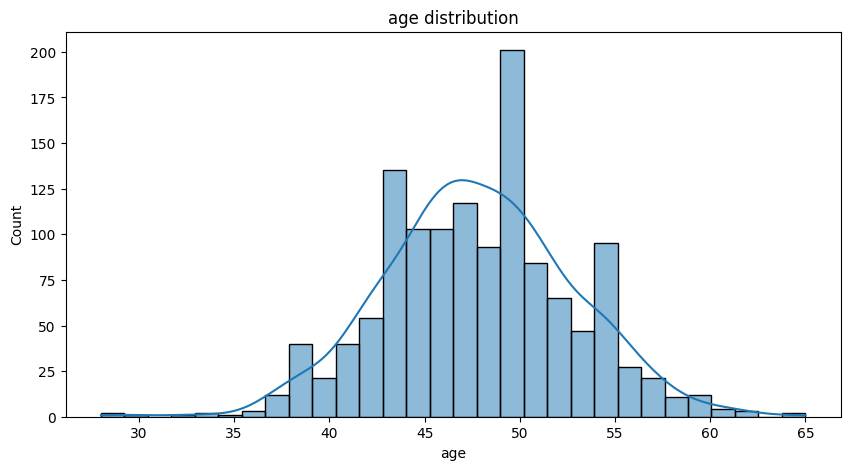

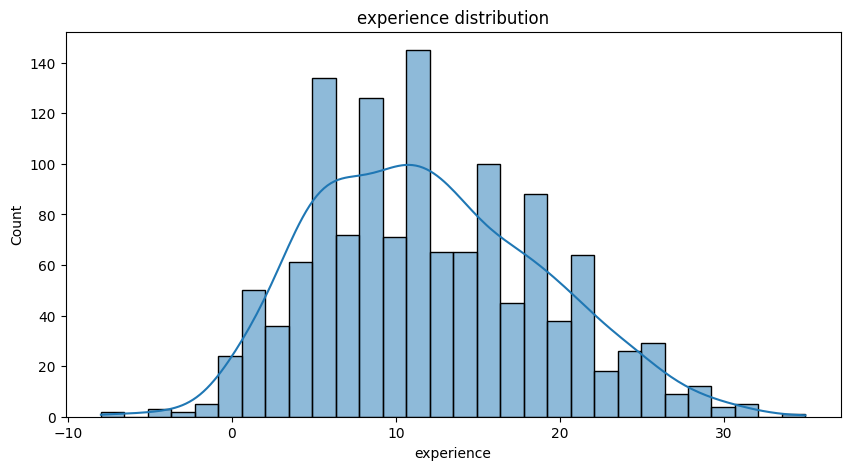

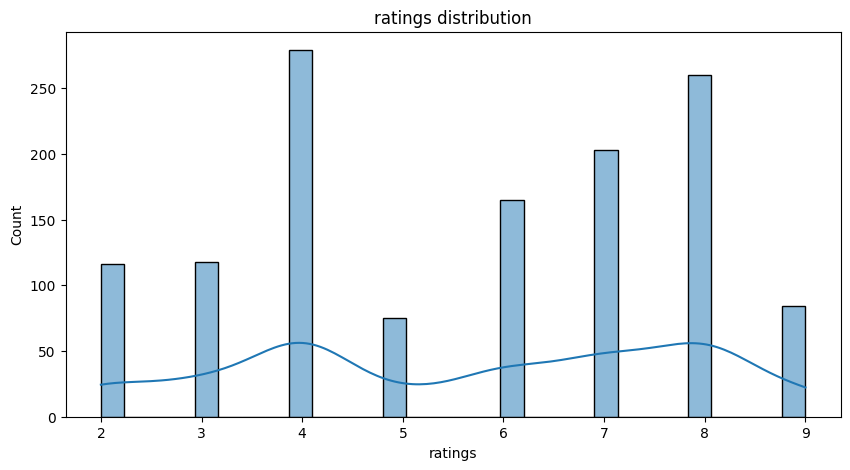

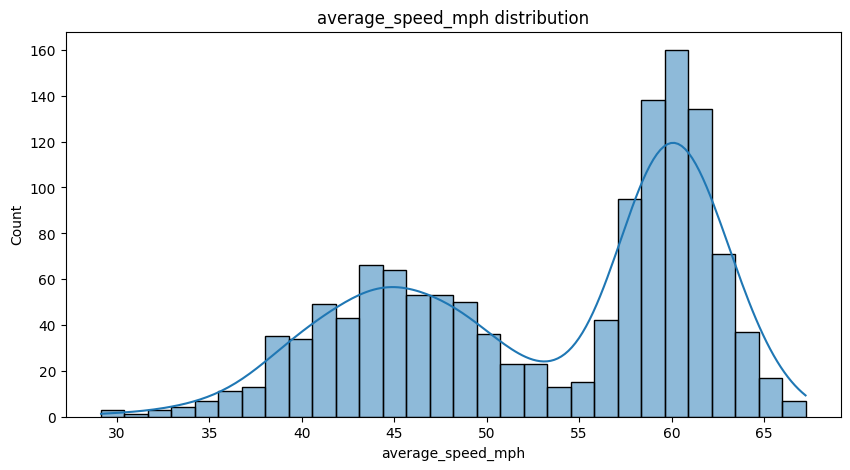

In [16]:
drivers_num_cols = ['age', 'experience', 'ratings', 'average_speed_mph']
for col in drivers_num_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(drivers_df[col], bins=30, kde=True)
    plt.title(f'{col} distribution')
    plt.xlabel(f'{col}')
    plt.show()

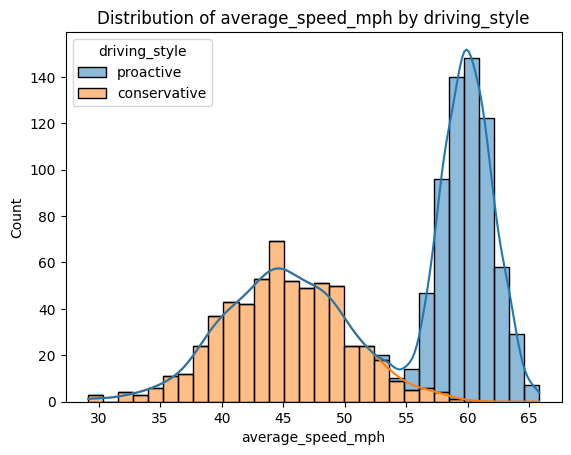

In [17]:

numeric_col = 'average_speed_mph' 
category_col = 'driving_style'     
sns.histplot(
    data=drivers_df,
    x=numeric_col,
    hue=category_col,  
    bins=30,
    kde=True,
    multiple="stack"     
)
plt.title(f"Distribution of {numeric_col} by {category_col}")
plt.show()

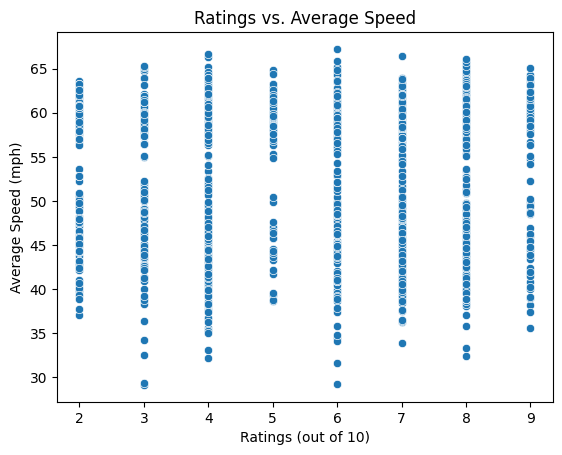

In [18]:
sns.scatterplot(x='ratings', y='average_speed_mph', data=drivers_df)
plt.title('Ratings vs. Average Speed')
plt.xlabel('Ratings (out of 10)')
plt.ylabel('Average Speed (mph)')
plt.show()

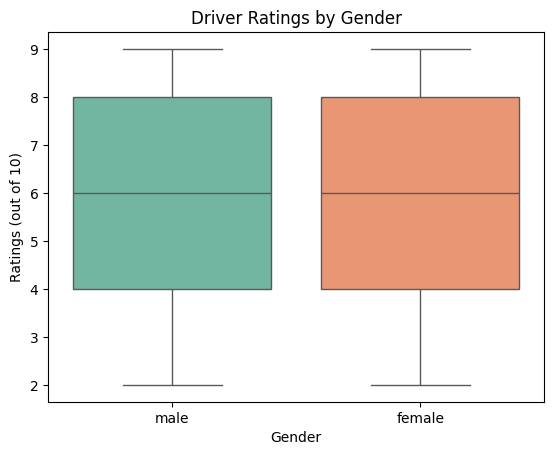

In [19]:
sns.boxplot(x='gender', y='ratings', data=drivers_df, palette='Set2')
plt.title('Driver Ratings by Gender')
plt.xlabel('Gender')
plt.ylabel('Ratings (out of 10)')
plt.show()

### Truck's Data Analysis

In [20]:
trucks_df.head()

,truck_id,truck_age,load_capacity_pounds,mileage_mpg,fuel_type
0,42302347,10,3000.0,17,gas
1,27867488,14,10000.0,22,diesel
2,13927774,8,10000.0,19,gas
3,69577118,8,20000.0,19,gas
4,28650047,10,4000.0,21,diesel


In [21]:
trucks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   truck_id              1300 non-null   int64  
 1   truck_age             1300 non-null   int64  
 2   load_capacity_pounds  1243 non-null   float64
 3   mileage_mpg           1300 non-null   int64  
 4   fuel_type             1300 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 50.9+ KB


In [22]:
trucks_df.describe(include='all')

,truck_id,truck_age,load_capacity_pounds,mileage_mpg,fuel_type
count,1.300000e+03,1300.000000,1243.000000,1300.000000,1300
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,diesel
freq,NaN,NaN,NaN,NaN,692
mean,3.263242e+07,9.513077,8610.619469,20.784615,NaN
std,2.205390e+07,2.039030,5583.759795,3.655876,NaN
min,1.000839e+07,3.000000,3000.000000,11.000000,NaN
25%,1.817244e+07,8.000000,4000.000000,18.000000,NaN
50%,2.584212e+07,10.000000,6000.000000,21.000000,NaN
75%,3.340052e+07,11.000000,15000.000000,24.000000,NaN


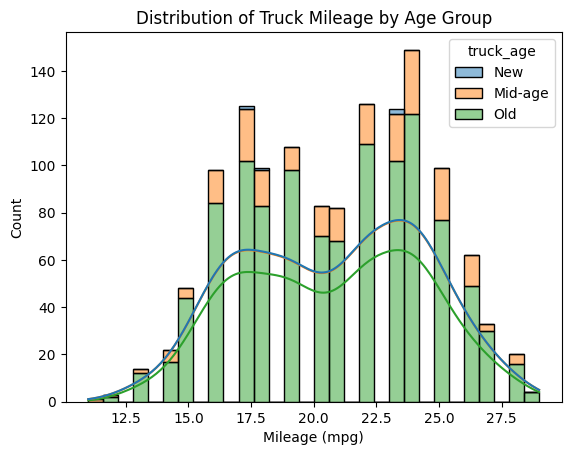

In [23]:
sns.histplot(
    x='mileage_mpg',
    hue=pd.cut(trucks_df['truck_age'], bins=[0,3,7,20], labels=['New','Mid-age','Old']),
    data=trucks_df,
    bins=30,
    kde=True,
    multiple="stack"
)

plt.title("Distribution of Truck Mileage by Age Group")
plt.xlabel("Mileage (mpg)")
plt.ylabel("Count")
plt.show()

In [24]:
low_mileage_threshold = 15
low_mileage_trucks = trucks_df[trucks_df['mileage_mpg'] <= low_mileage_threshold]

<Axes: xlabel='truck_age', ylabel='proportion'>

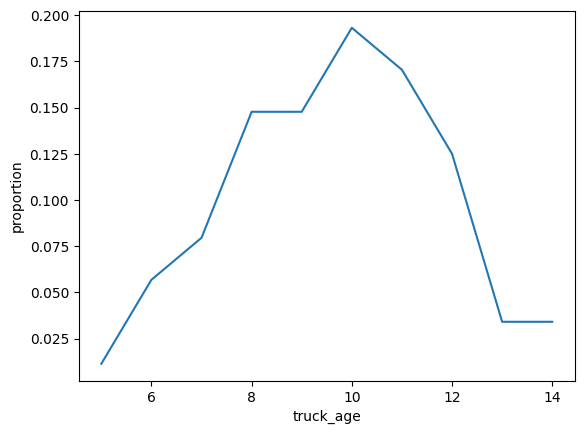

In [25]:
sns.lineplot(low_mileage_trucks['truck_age'].value_counts(normalize=True).sort_index())

### Routers Data Analyst

In [26]:
routes_df.head()

,route_id,origin_id,destination_id,distance,average_hours
0,R-ada2a391,C-927ceb5e,C-56e39a5e,1735.06,34.70
1,R-ae0ef31f,C-927ceb5e,C-73ae5412,1498.24,29.96
2,R-4beec5fd,C-927ceb5e,C-4fe0fa24,6078.46,121.57
3,R-8d7a7fb2,C-927ceb5e,C-451776b7,1543.01,30.86
4,R-b236e347,C-927ceb5e,C-d80a1e7d,310.75,6.22


In [27]:
routes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   route_id        2352 non-null   object 
 1   origin_id       2352 non-null   object 
 2   destination_id  2352 non-null   object 
 3   distance        2352 non-null   float64
 4   average_hours   2352 non-null   float64
dtypes: float64(2), object(3)
memory usage: 92.0+ KB


### Traffic Data Analysis

In [28]:
traffic_df.head()   

,route_id,date,hour,no_of_vehicles,accident
0,R-ada2a391,2019-01-01,0,669.0,0
1,R-ada2a391,2019-01-01,100,628.0,0
2,R-ada2a391,2019-01-01,200,516.0,0
3,R-ada2a391,2019-01-01,300,582.0,0
4,R-ada2a391,2019-01-01,400,564.0,0


In [29]:
traffic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2597913 entries, 0 to 2597912
Data columns (total 5 columns):
 #   Column          Dtype         
---  ------          -----         
 0   route_id        object        
 1   date            datetime64[ns]
 2   hour            int64         
 3   no_of_vehicles  float64       
 4   accident        int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 99.1+ MB


In [30]:
traffic_df.isnull().sum()

route_id             0
date                 0
hour                 0
no_of_vehicles    1152
accident             0
dtype: int64

In [31]:
traffic_df.describe()

,date,hour,no_of_vehicles,accident
count,2597913,2.597913e+06,2.596761e+06,2.597913e+06
mean,2019-01-23 12:00:26.256767232,1.150021e+03,1.566776e+03,5.320848e-02
min,2019-01-01 00:00:00,0.000000e+00,1.000000e+02,0.000000e+00
25%,2019-01-12 00:00:00,6.000000e+02,6.060000e+02,0.000000e+00
50%,2019-01-24 00:00:00,1.200000e+03,1.969000e+03,0.000000e+00
75%,2019-02-04 00:00:00,1.800000e+03,2.326000e+03,0.000000e+00
max,2019-02-15 00:00:00,2.300000e+03,3.636000e+03,1.000000e+00
std,NaN,6.922211e+02,8.959424e+02,2.244490e-01


In [32]:
def categorize_time(hour):
    """
    Categorizes hours of the day into time periods.

    Args:
    hour (int): Hour in 24-hour format.

    Returns:
    str: Categorized time period.
    """
    if 300 <= hour < 600:
        return 'Early Morning'
    elif 600 <= hour < 1200:
        return 'Morning'
    elif 1200 <= hour < 1600:
        return 'Noon'
    elif 1600 <= hour < 2000:
        return 'Evening'
    elif 2000 <= hour < 2300:
        return 'Night'
    elif 0 <= hour < 300:
        return 'Night'

traffic = traffic_df.copy()

traffic['time_category'] = traffic['hour'].apply(categorize_time)

mean_vehicles_by_time = traffic.groupby('time_category')['no_of_vehicles'].mean()

In [33]:
mean_vehicles_by_time

time_category
Early Morning     563.030071
Evening          1999.185426
Morning          1735.696694
Night            1263.594675
Noon             1990.786218
Name: no_of_vehicles, dtype: float64

<Axes: xlabel='time_category', ylabel='no_of_vehicles'>

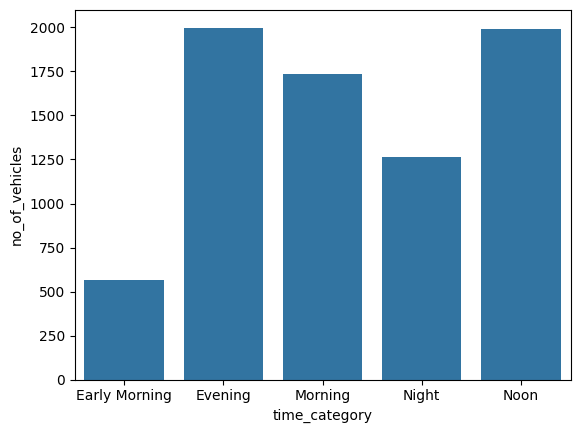

In [34]:
sns.barplot(mean_vehicles_by_time)

# Feature Store

In [35]:
import hopsworks
project = hopsworks.login()
fs = project.get_feature_store()

2025-08-27 14:11:00,131 INFO: Initializing external client
2025-08-27 14:11:00,131 INFO: Base URL: https://c.app.hopsworks.ai:443


2025-08-27 14:11:02,847 INFO: Python Engine initialized.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1247380


### Driver Data FS

In [36]:
drivers_df.head(2)

,driver_id,name,gender,age,experience,driving_style,ratings,vehicle_no,average_speed_mph
0,d9f30553-6,Daniel Marks,male,47,5,proactive,7,42302347,62.22
1,82de7bb8-2,Clifford Carr,male,47,14,proactive,4,27867488,60.89


In [37]:
drivers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   driver_id          1300 non-null   object 
 1   name               1300 non-null   object 
 2   gender             1277 non-null   object 
 3   age                1300 non-null   int64  
 4   experience         1300 non-null   int64  
 5   driving_style      1248 non-null   object 
 6   ratings            1300 non-null   int64  
 7   vehicle_no         1300 non-null   int64  
 8   average_speed_mph  1300 non-null   float64
dtypes: float64(1), int64(4), object(4)
memory usage: 91.5+ KB


In [38]:
drivers_df['event_time'] = pd.to_datetime('2025-07-01')

In [39]:
drivers_df.isna().sum()

driver_id             0
name                  0
gender               23
age                   0
experience            0
driving_style        52
ratings               0
vehicle_no            0
average_speed_mph     0
event_time            0
dtype: int64

In [40]:
drivers_df['driving_style']=drivers_df['driving_style'].fillna('Unknown')
drivers_df['gender']=drivers_df['gender'].fillna('Unknown')

In [41]:
drivers_df.columns

Index(['driver_id', 'name', 'gender', 'age', 'experience', 'driving_style',
       'ratings', 'vehicle_no', 'average_speed_mph', 'event_time'],
      dtype='object')

In [42]:
drivers_fg = fs.get_or_create_feature_group(
    name="drivers_details_fg",                # Name of the feature group
    version=1,                                # Version number
    description="Drivers data",               # Description of the feature group
    primary_key=['driver_id'],                # Primary key(s) for the feature group
    event_time='event_time',                  # Event time column
    online_enabled=False                      # Online feature store capability
)

# Insert the drivers DataFrame into the feature group
drivers_fg.insert(drivers_df)

Uploading Dataframe: 100.00% |██████████| Rows 1300/1300 | Elapsed Time: 00:03 | Remaining Time: 00:00


Launching job: drivers_details_fg_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai:443/p/1247380/jobs/named/drivers_details_fg_1_offline_fg_materialization/executions


(Job('drivers_details_fg_1_offline_fg_materialization', 'SPARK'), None)

In [43]:
drivers_df=drivers_df.sort_values(["event_time","driver_id"])

In [44]:
feature_descriptions_drivers = [

    {"name": "driver_id", "description": "unique identification for each driver"},
    {"name": "name", "description": "name of the truck driver"},
    {"name": "gender", "description": "gender of the truck driver"},
    {"name": "age", "description": "age of the truck driver"},
    {"name": "experience", "description": "experience of the truck driver in years"},
    {"name": "driving_style", "description": "driving style of the truck driver, conservative or proactive"},
    {"name": "ratings", "description": "average rating of the truck driver on a scale of 1 to 5"},
    {"name": "vehicle_no", "description": "the number of the driver’s truck"},
    {"name": "average_speed_mph", "description": "average speed of the truck driver in miles per hour"},
    {"name": "event_time", "description": "dummy event time"}

]

for desc in feature_descriptions_drivers:
    drivers_fg.update_feature_description(desc["name"], desc["description"])

In [45]:
drivers_fg.statistics_config = {
    "enabled": True,        # Enable statistics calculation
    "histograms": True,     # Include histograms in the statistics
    "correlations": True    # Include correlations in the statistics
}

# Update the statistics configuration for the feature group
drivers_fg.update_statistics_config()

# Compute statistics for the feature group
drivers_fg.compute_statistics()

Statistics Job started successfully, you can follow the progress at 
http://c.app.hopsworks.ai/p/1247380/jobs/named/drivers_details_fg_1_compute_stats_27082025071311/executions
2025-08-27 14:13:21,203 INFO: Waiting for execution to finish. Current state: SUBMITTED. Final status: UNDEFINED
2025-08-27 14:13:24,548 INFO: Waiting for execution to finish. Current state: RUNNING. Final status: UNDEFINED
2025-08-27 14:14:31,132 INFO: Waiting for execution to finish. Current state: AGGREGATING_LOGS. Final status: SUCCEEDED
2025-08-27 14:14:31,423 INFO: Waiting for log aggregation to finish.
2025-08-27 14:14:44,154 INFO: Execution finished successfully.


Job('drivers_details_fg_1_compute_stats_27082025071311', 'PYSPARK')

### Truck Data FS

In [46]:
trucks_df.head(2)

,truck_id,truck_age,load_capacity_pounds,mileage_mpg,fuel_type
0,42302347,10,3000.0,17,gas
1,27867488,14,10000.0,22,diesel


In [47]:
trucks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   truck_id              1300 non-null   int64  
 1   truck_age             1300 non-null   int64  
 2   load_capacity_pounds  1243 non-null   float64
 3   mileage_mpg           1300 non-null   int64  
 4   fuel_type             1300 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 50.9+ KB


In [48]:
trucks_df.isna().sum()

truck_id                 0
truck_age                0
load_capacity_pounds    57
mileage_mpg              0
fuel_type                0
dtype: int64

In [49]:
trucks_df['fuel_type'].unique()

array(['gas', 'diesel', ''], dtype=object)

In [50]:
trucks_df['fuel_type']=trucks_df['fuel_type'].replace("",'Unknown')

In [52]:
trucks_df['fuel_type'].value_counts()

fuel_type
diesel     692
gas        568
Unknown     40
Name: count, dtype: int64

In [53]:
trucks_df['event_time'] = pd.to_datetime('2025-07-01')
trucks_df=trucks_df.sort_values(["event_time","truck_id"])

In [54]:
truck_fg = fs.get_or_create_feature_group(
    name="truck_details_fg",          # Name of the feature group
    version=1,                        # Version number
    description="Truck data",         # Description of the feature group
    primary_key=['truck_id'],         # Primary key(s) for the feature group
    event_time='event_time',          # Event time column
    online_enabled=False              # Online feature store capability (set to False)
)

In [55]:
truck_fg.insert(trucks_df)

Feature Group created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/1247380/fs/1230915/fg/1506644


Uploading Dataframe: 100.00% |██████████| Rows 1300/1300 | Elapsed Time: 00:02 | Remaining Time: 00:00


Launching job: truck_details_fg_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai:443/p/1247380/jobs/named/truck_details_fg_1_offline_fg_materialization/executions


(Job('truck_details_fg_1_offline_fg_materialization', 'SPARK'), None)

In [56]:
feature_descriptions_trucks = [
    {"name":'truck_id',"description":"the unique identification number of the truck"},
    {"name":'truck_age',"description":"age of the truck in years"},
    {"name":'load_capacity_pounds',"description":"loading capacity of the truck in years"},
    {"name":'mileage_mpg',"description": "mileage of the truck in miles per gallon"},
    {"name":'fuel_type',"description":"fuel type of the truck"},
    {"name": "event_time", "description": "dummy event time"}

]

for desc in feature_descriptions_trucks:
    truck_fg.update_feature_description(desc["name"], desc["description"])

In [ ]:
truck_fg.statistics_config = {
    "enabled": True,
    "histograms": True,
    "correlations": True
}

truck_fg.update_statistics_config()
truck_fg.compute_statistics()

### Routes Data FS

In [58]:
routes_df.head()

,route_id,origin_id,destination_id,distance,average_hours
0,R-ada2a391,C-927ceb5e,C-56e39a5e,1735.06,34.70
1,R-ae0ef31f,C-927ceb5e,C-73ae5412,1498.24,29.96
2,R-4beec5fd,C-927ceb5e,C-4fe0fa24,6078.46,121.57
3,R-8d7a7fb2,C-927ceb5e,C-451776b7,1543.01,30.86
4,R-b236e347,C-927ceb5e,C-d80a1e7d,310.75,6.22


In [59]:
routes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   route_id        2352 non-null   object 
 1   origin_id       2352 non-null   object 
 2   destination_id  2352 non-null   object 
 3   distance        2352 non-null   float64
 4   average_hours   2352 non-null   float64
dtypes: float64(2), object(3)
memory usage: 92.0+ KB


In [60]:
routes_df['event_time'] = pd.to_datetime('2025-07-01')
routes_df=routes_df.sort_values(["event_time","route_id"])

In [61]:
routes_fg = fs.get_or_create_feature_group(
    name="routes_details_fg",         # Name of the feature group
    version=1,                        # Version number
    description="Routes data",        # Description of the feature group
    primary_key=['route_id'],         # Primary key(s) for the feature group
    event_time='event_time',          # Event time column
    online_enabled=False              # Online feature store capability (set to False)
)

In [62]:
routes_fg.insert(routes_df)

Feature Group created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/1247380/fs/1230915/fg/1506645


Uploading Dataframe: 100.00% |██████████| Rows 2352/2352 | Elapsed Time: 00:03 | Remaining Time: 00:00


Launching job: routes_details_fg_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai:443/p/1247380/jobs/named/routes_details_fg_1_offline_fg_materialization/executions


(Job('routes_details_fg_1_offline_fg_materialization', 'SPARK'), None)

In [63]:
feature_descriptions_routes = [
    {"name": 'route_id', "description": "the unique identifier of the routes"},
    {"name": 'origin_id', "description": "the city identification number for the origin city"},
    {"name": 'destination_id', "description": " the city identification number for the destination"},
    {"name": 'distance', "description": " the distance between the origin and destination cities in miles"},
    {"name": 'average_hours', "description": "average time needed to travel from the origin to the destination in hours"},
    {"name": "event_time", "description": "dummy event time"}

]

for desc in feature_descriptions_routes:
    routes_fg.update_feature_description(desc["name"], desc["description"])

In [ ]:
routes_fg.statistics_config = {
    "enabled": True,
    "histograms": True,
    "correlations": True
}

routes_fg.update_statistics_config()
routes_fg.compute_statistics()